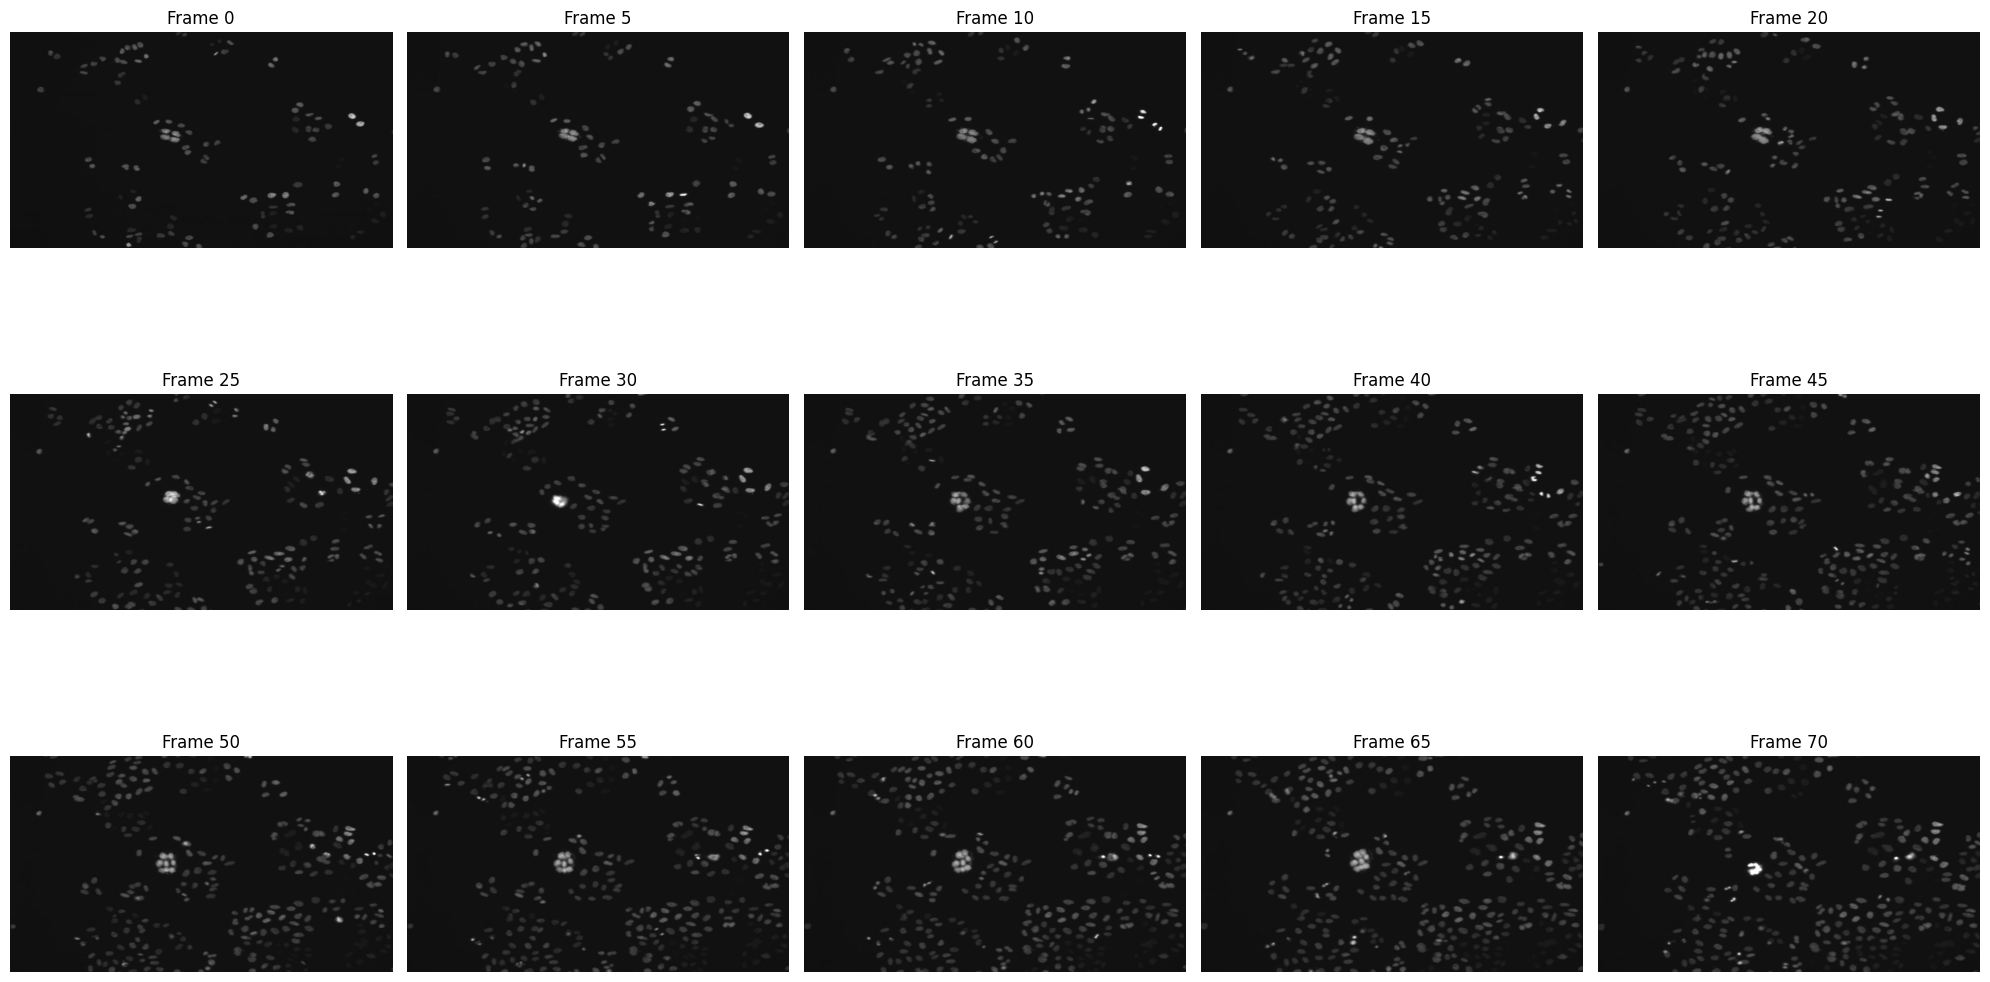

In [3]:
import cv2
import matplotlib.pyplot as plt

video_path = "/proj/aicell/users/x_aleho/video-diffusion/data/generated/test_generations_i2v/real_videos/00008_01.mp4"

def display_video_frames(video_path, frames_per_row=5, num_frames=15):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video file")
        return
    
    # Calculate layout
    num_rows = (num_frames + frames_per_row - 1) // frames_per_row
    fig, axes = plt.subplots(num_rows, frames_per_row, figsize=(20, 4*num_rows))
    axes = axes.flatten()
    
    frame_interval = int(cap.get(cv2.CAP_PROP_FRAME_COUNT) / num_frames)
    
    for i in range(num_frames):
        # Set frame position
        frame_pos = i * frame_interval
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_pos)
        
        # Read frame
        ret, frame = cap.read()
        if ret:
            # Convert BGR to RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            axes[i].imshow(frame_rgb)
            axes[i].axis('off')
            axes[i].set_title(f'Frame {frame_pos}')
    
    # Hide empty subplots if any
    for i in range(num_frames, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    cap.release()

# Display 15 frames from the video, 5 per row
display_video_frames(video_path, frames_per_row=5, num_frames=15)

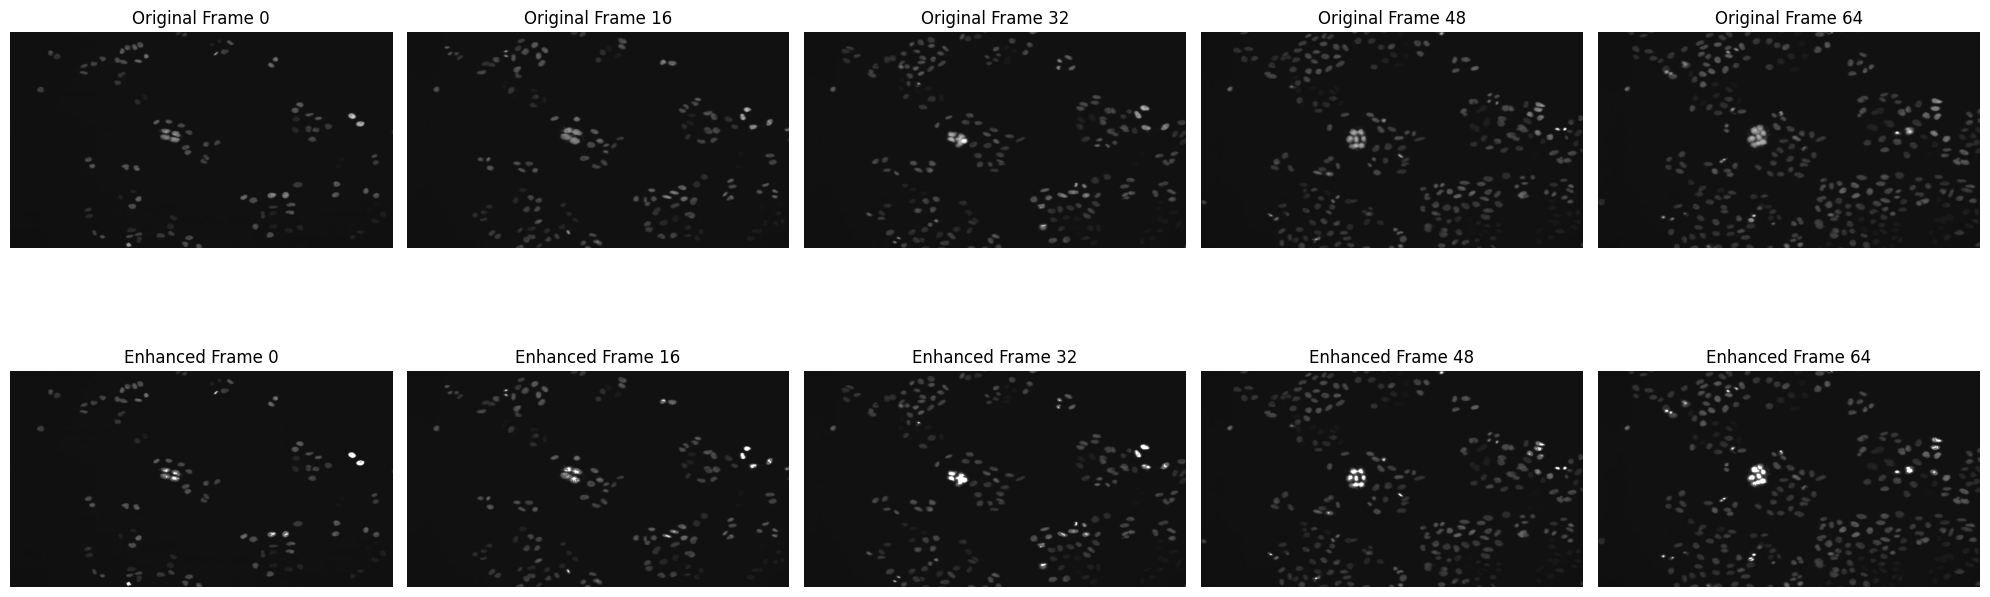

In [9]:
import cv2
import numpy as np

def increase_intensity(image, factor=1.5, threshold=128):
    """
    Increase the intensity of bright areas in the image.
    
    Args:
        image: Input image (BGR or RGB format)
        factor: Multiplication factor for brightness increase (default: 1.5)
        threshold: Brightness threshold (0-255) above which pixels get enhanced (default: 128)
    
    Returns:
        Modified image with increased intensity
    """
    # Convert to float32 for calculations
    img_float = image.astype('float32')
    
    # Create a mask for pixels above threshold
    bright_mask = image > threshold
    
    # Increase intensity for bright pixels
    img_float[bright_mask] = img_float[bright_mask] * factor
    
    # Clip values to valid range [0, 255]
    img_float = np.clip(img_float, 0, 255)
    
    # Convert back to uint8
    return img_float.astype('uint8')

def display_video_frames_with_intensity(video_path, frames_per_row=5, num_frames=15, intensity_factor=1.5):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video file")
        return
    
    # Calculate layout for original and enhanced frames side by side
    num_rows = (num_frames + frames_per_row - 1) // frames_per_row
    fig, axes = plt.subplots(num_rows * 2, frames_per_row, figsize=(20, 8*num_rows))
    axes = axes.reshape(2*num_rows, frames_per_row)
    
    frame_interval = int(cap.get(cv2.CAP_PROP_FRAME_COUNT) / num_frames)
    
    for i in range(num_frames):
        row = i // frames_per_row
        col = i % frames_per_row
        
        # Set frame position
        frame_pos = i * frame_interval
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_pos)
        
        # Read frame
        ret, frame = cap.read()
        if ret:
            # Convert BGR to RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Original frame
            axes[row*2, col].imshow(frame_rgb)
            axes[row*2, col].axis('off')
            axes[row*2, col].set_title(f'Original Frame {frame_pos}')
            
            # Enhanced frame
            frame_enhanced = increase_intensity(frame_rgb, factor=intensity_factor)
            axes[row*2 + 1, col].imshow(frame_enhanced)
            axes[row*2 + 1, col].axis('off')
            axes[row*2 + 1, col].set_title(f'Enhanced Frame {frame_pos}')
    
    # Hide empty subplots if any
    for row in range(num_rows * 2):
        for col in range(frames_per_row):
            if row*frames_per_row + col >= num_frames*2:
                axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
    cap.release()

# Display original and enhanced frames
display_video_frames_with_intensity(video_path, frames_per_row=5, num_frames=5, intensity_factor=100)